# **Predective Maintenance**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

## **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Project/predictive_maintenance.csv')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## **Understanding Data**

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
categorical_var = df.select_dtypes(include = 'object')
categorical_var.head()

,Product ID,Type,Failure Type
0,M14860,M,No Failure
1,L47181,L,No Failure
2,L47182,L,No Failure
3,L47183,L,No Failure
4,L47184,L,No Failure


In [ ]:
numerical_var = df.select_dtypes(include = 'number')
numerical_var.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0


In [ ]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

### **Insights**

- There are 10,000 records and 10 features in the dataset.
- The are no missing values.
- UDI seems to be an index number



# **Preprocessing**

## **Checking Co-relation**

In [ ]:
corr = df.corr()
corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


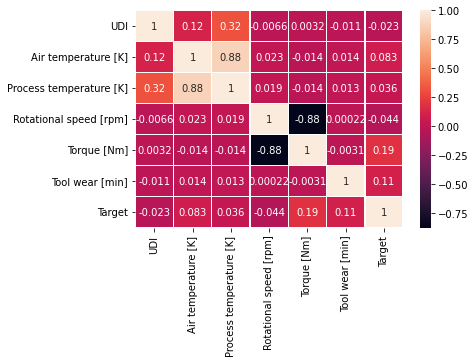

In [ ]:
sns.heatmap(corr,annot=True,linewidths=0.5)

### **Insights**

- There's high corelation between Torque and Rotational_speed fearures.
- There's also high coreation between Air_temp and Process_temp.


```
But we will not drop these features because they are important for our dataset prediction and we also have less features as independant variable 
```



## **Drop unnecessary features**

In [ ]:
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [ ]:
df = df.drop(['UDI','Product ID'],axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


## **Droping un-necessary records**

In [ ]:
df.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

### **-**
- Type and Failure_type are of type - object and they both could be our Dependant-variable.


```
Lets check for inconsistencies
```



In [ ]:
target_failure = df[df['Target']==1]
target_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

### **Insight**

- We can see that there are records for 'No Failure' category in Target = 1;  thus we will delete these records.

In [ ]:
non_target_failure = df[df['Target']==0]
non_target_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

### **Insight**

- We can see that there are records for 'Ramdom Failure' category in Target = 0;  thus we will delete these records too.

In [ ]:
x = target_failure[target_failure['Failure Type'] == 'No Failure'].index
df.drop(x, axis=0, inplace=True)

In [ ]:
x1 = non_target_failure[non_target_failure['Failure Type'] == 'Random Failures'].index
df.drop(x1, axis=0, inplace=True)

### Deleted records :- 27

- 9 belonged to class Failure in 'Target' variable and Not failure in target 'Failure Type'

- 18 belonged to class Not failure in 'Target' variable and Random failures in target 'Failure Type

In [ ]:
# Let's reset the index
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(9973, 8)

# **Visualisation**

## **Failure Percentage**

In [ ]:
a = pd.DataFrame(df['Target'].value_counts())
a

,Target
0,9643
1,330


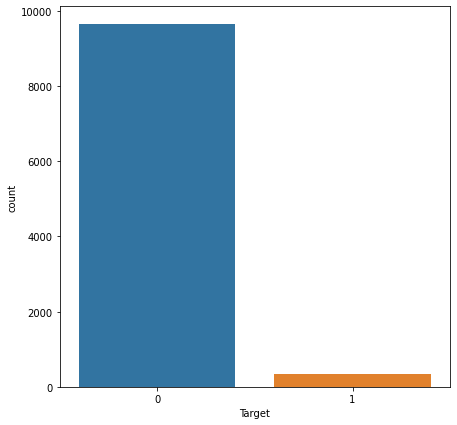

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="Target")

### **Insight**

- Thus we have highly unbalanced dataset.

## **Pie Chart**


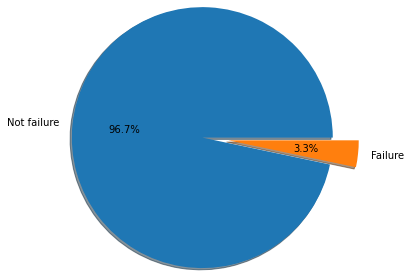

In [ ]:
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%.1f%%',shadow=True,radius=1.5)
#plt.title('Failure vs Not_Failure')
plt.show()

### **Insights**

- We have very high percentage of unblanced data.

## **Failure Type**

In [ ]:
f = pd.DataFrame(df['Failure Type'].value_counts())
f

,Failure Type
No Failure,9643
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45


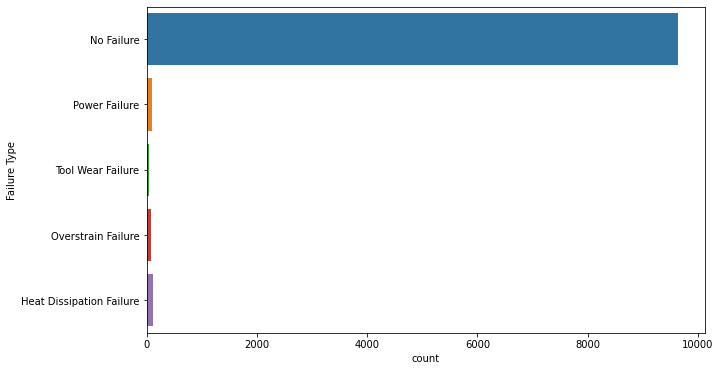

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y="Failure Type")

In [ ]:
n = df[df['Target']==1]

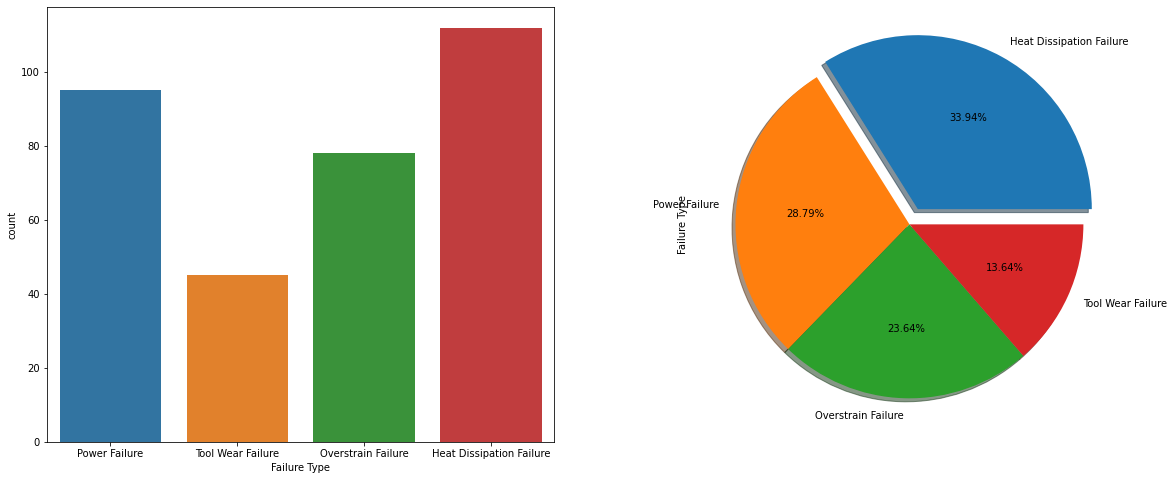

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data=df[df['Target']==1],x="Failure Type")

plt.subplot(1,2,2)
n['Failure Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%',shadow=True,explode=[0.1,0,0,0])

### **Insights**

- Heat_Dissipation Failure is occurring more often then other failures.
- Least occurring failure is Tool_Wear failure.

## **Count of machines according type**

In [ ]:
g = pd.DataFrame(df['Type'].value_counts())
g

,Type
L,5984
M,2991
H,998


## **Pivot_Table**

In [ ]:
pd.pivot_table(data=df,index=['Type','Failure Type'],values='Target',aggfunc='count')

Target
Type Failure Type                    
H    Heat Dissipation Failure       8
     No Failure                   978
     Overstrain Failure             1
     Power Failure                  5
     Tool Wear Failure              6
L    Heat Dissipation Failure      74
     No Failure                  5753
     Overstrain Failure            73
     Power Failure                 59
     Tool Wear Failure             25
M    Heat Dissipation Failure      30
     No Failure                  2912
     Overstrain Failure             4
     Power Failure                 31
     Tool Wear Failure             14

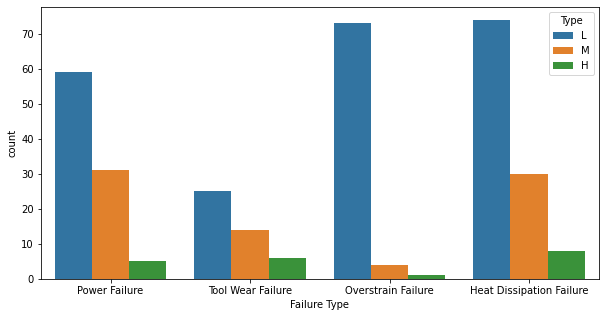

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x="Failure Type", hue='Type')

### **Insights**

- More number of Failure are encountered in Low-Quality Machines.
- High-Quality machines have least amount of failure.

In [ ]:
t = df[df['Target']==1]

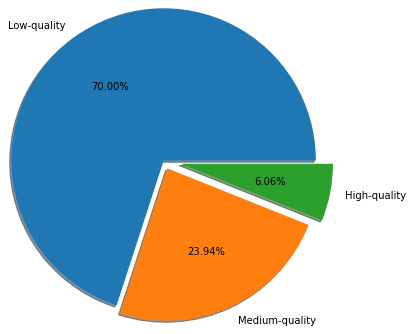

In [ ]:
plt.pie(t['Type'].value_counts(), autopct='%.2f%%',shadow=True,radius=1.75,explode=[0,0.1,0.2],labels=['Low-quality','Medium-quality','High-quality'])
#plt.title('Failure Vs Type')
plt.show()

### **Insights**

- High qualiy machines have least chances of failure < Medium quality machines < Low quality machines

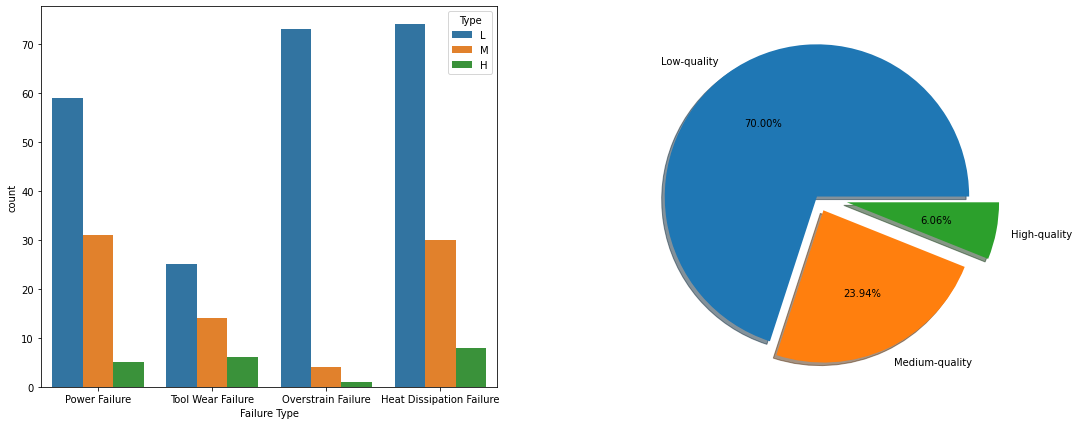

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(data=df[df['Target']==1],x="Failure Type", hue='Type')
plt.subplot(1,2,2)
plt.pie(t['Type'].value_counts(), autopct='%.2f%%',shadow=True,radius=1,explode=[0,0.1,0.2],labels=['Low-quality','Medium-quality','High-quality'])
plt.show()

In [ ]:
pd.pivot_table(data=df,index=['Type','Target'],values='Failure Type',aggfunc='count')

Failure Type
Type Target              
H    0                978
     1                 20
L    0               5753
     1                231
M    0               2912
     1                 79

In [ ]:
p1=pd.pivot_table(data=df,index=['Type'],values='Target',aggfunc='mean')
p1

,Target
Type,
H,0.020040
L,0.038603
M,0.026413


In [ ]:
h=0.02004
l=0.03860
m=0.02641
p1.sum()
w=1-p1.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


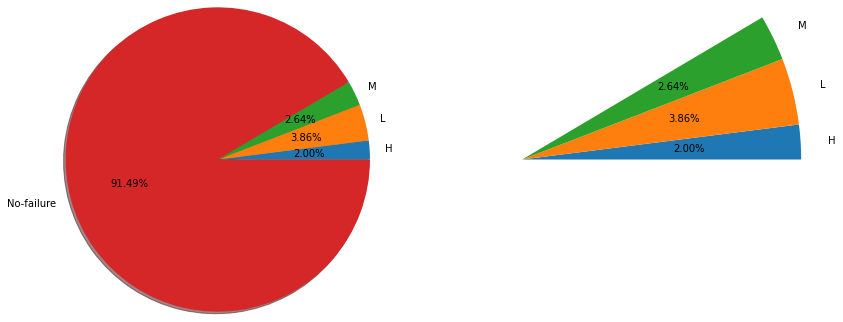

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie([h,l,m,w],labels=['H','L','M','No-failure'],autopct='%.2f%%',radius=1.5,shadow=True)
plt.subplot(1,2,2)
plt.pie(p1.values,labels=p1.index,autopct='%.2f%%',radius=2.75)
plt.show()

## **PairPlot**

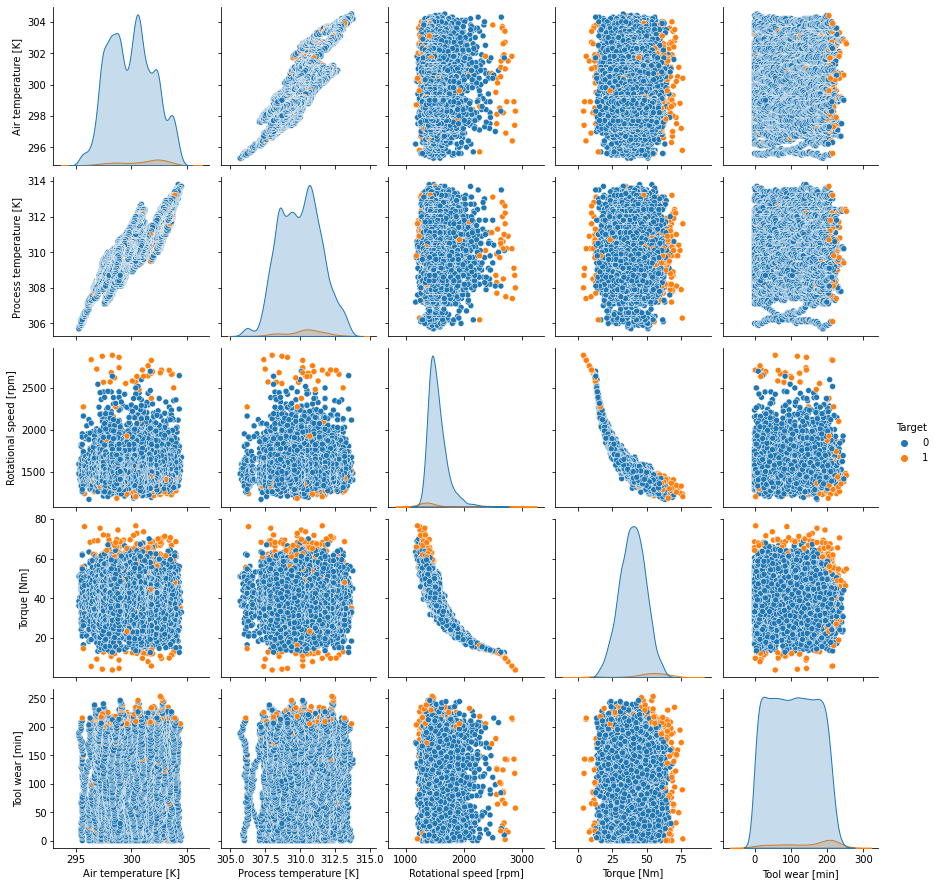

In [ ]:
sns.pairplot(data=df,hue='Target')

### **Insights**

- Torque and rotational_speed are highly correlated.
- Process_temp and air_temp are also highly correlated.
- We can see that Failure occures at low or high values for some features.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


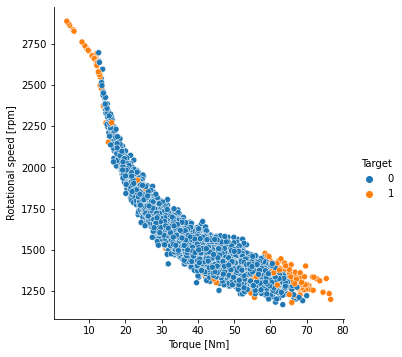

In [ ]:
sns.pairplot(x_vars='Torque [Nm]',y_vars='Rotational speed [rpm]',data=df,hue='Target',size=5,aspect=1)

### **Insight**

- The machinery fails either for the lowest or highest values of Torque and Rotational_speed.

## **Scatter Plot**

## **FailureType Vs Torque Vs Rotational_Speed**

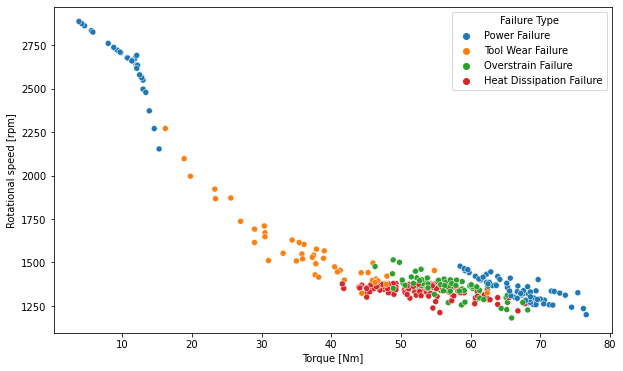

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['Target'] == 1], x='Torque [Nm]', y='Rotational speed [rpm]', hue='Failure Type')
plt.show()

### **Insights**

- Power failure happens both for lower and higher rotational_speed and torque. 

- Between torques 15(Nm) and 40(Nm) all failures are tool wear.

- Overstrain and Heat_dissipation failures take place with torques ranging from around 40(Nm) and 65(Nm) and rotational speeds from 1200 rpm to 1600 rpm approximately.

- For heat_dissipation failures, the torque range is bigger and the rotational speed range is smaller, compared to overstrain failures.

## **Line Plot**

## **Probability of Failure**

In [ ]:
def prob_fail(feature,df):
    x,y = [],[]
    for i in df[feature].unique():
        data = df
        data = data[data[feature]>=i]
        y.append(round((data.Target.mean()*100),2))
        x.append(i)
    return(x,y)

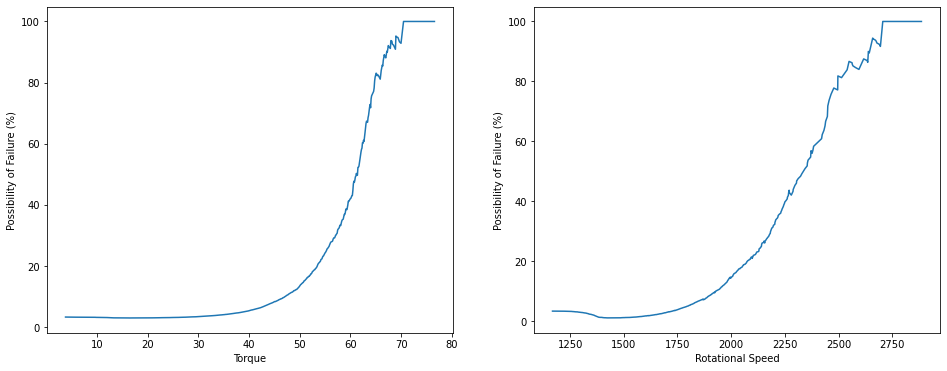

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
x,y=prob_fail('Torque [Nm]', df)
sns.lineplot(x=x,y=y)
plt.xlabel('Torque')
plt.ylabel("Possibility of Failure (%)")

plt.subplot(1,2,2)
x,y=prob_fail('Rotational speed [rpm]', df)
sns.lineplot(x=x,y=y)
plt.xlabel('Rotational Speed')
plt.ylabel("Possibility of Failure (%)")
plt.show()

### **Insights**

- There's 100% guarantee of Machine-Failure when torque>70[Nm] and rotational_speed>2700.

- We can also see that generally more machines failures occures as the rotation speed and torque of machine increases.

## **Failure Type Vs Air_Temp Vs Process_Temp**

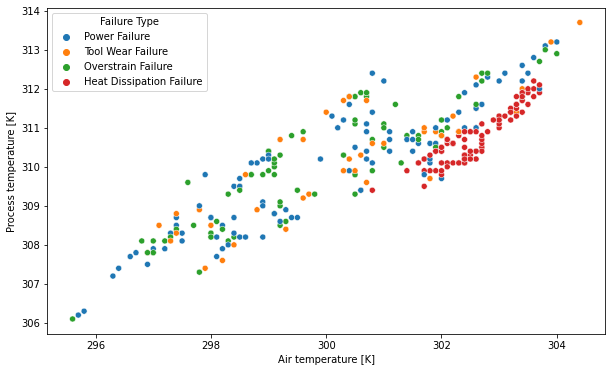

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['Target'] == 1], x='Air temperature [K]', y='Process temperature [K]', hue='Failure Type')
plt.show()

### **Insights**

- There no such adequate factor for Power, Tool-wear and Overstrain failures based on Air and Process temperature.

- But we can see that Heat-Dissipation failures occures when Air_temp is greater than 300[k] and Process_temp higher than 309[k] . 

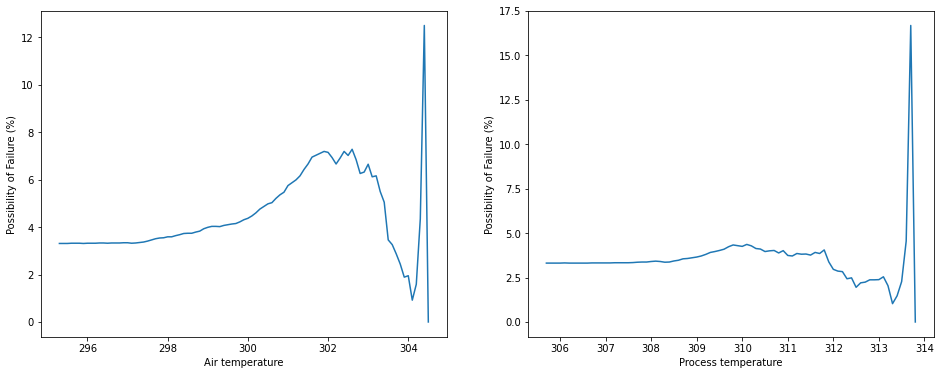

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
x,y=prob_fail('Air temperature [K]', df)
sns.lineplot(x=x,y=y)
plt.xlabel('Air temperature')
plt.ylabel("Possibility of Failure (%)")

plt.subplot(1,2,2)
x,y=prob_fail('Process temperature [K]', df)
sns.lineplot(x=x,y=y)
plt.xlabel('Process temperature')
plt.ylabel("Possibility of Failure (%)")
plt.show()

In [ ]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
